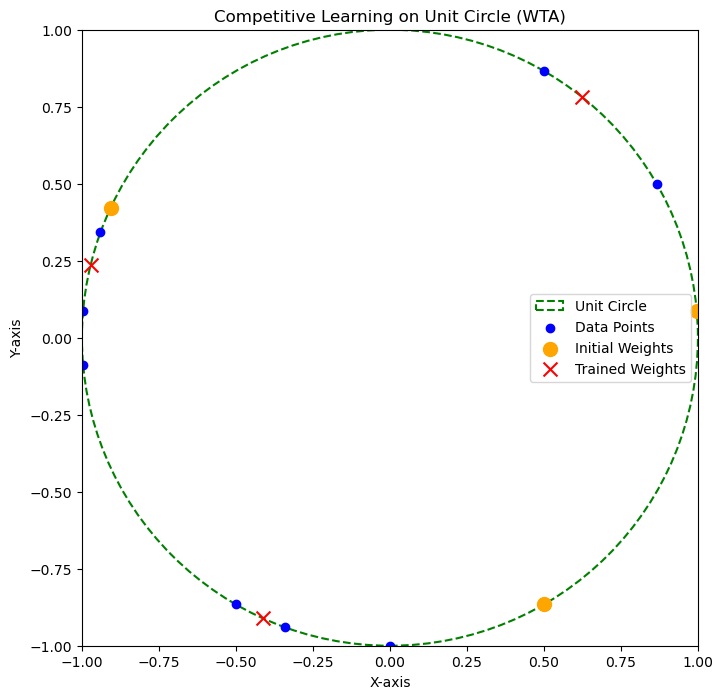

Trained Weights:
Weight 1: Magnitude = 1.0000, Angle = 51.45 degrees
Weight 2: Magnitude = 1.0000, Angle = 166.40 degrees
Weight 3: Magnitude = 1.0000, Angle = 245.64 degrees


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 生成单位圆上的点集
def generate_circle_points(num_points):
    angles = 2 * np.pi * np.random.rand(num_points)
    points = np.array([np.cos(angles), np.sin(angles)]).T
    return points

# 初始化训练集合，由八个样本向量组成
def generate_fixed_points():
    angles = np.array([185, 175, 160, 270, 250, 240, 30, 60]) * np.pi / 180  # 将角度转换为弧度
    points = np.array([np.cos(angles), np.sin(angles)]).T
    return points

# 初始化神经网络权重
def initialize_weights():
    angles = np.array([5, 155, 300]) * np.pi / 180  # 将角度转换为弧度
    weights = np.array([np.cos(angles), np.sin(angles)]).T
    return weights

# 竞争神经网络的训练过程 (胜者为王, WTA)
def competitive_learning(points, weights, lr, epochs):
    num_neurons = weights.shape[0]
    
    for epoch in range(epochs):
        for point in points:
            # 计算每个神经元的距离
            distances = np.linalg.norm(weights - point, axis=1)
            # 找到获胜神经元
            winner_idx = np.argmin(distances)
            # 更新获胜神经元的权重
            weights[winner_idx] += lr * (point - weights[winner_idx])
            # 归一化权重，以确保它们仍然在单位圆上
            weights[winner_idx] /= np.linalg.norm(weights[winner_idx])
    
    return weights

# 可视化聚类结果
def visualize(points, initial_weights, trained_weights):
    plt.figure(figsize=(8, 8))
    # 绘制单位圆
    circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--', linewidth=1.5, label='Unit Circle')
    plt.gca().add_artist(circle)
    # 绘制数据点
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Data Points')
    # 绘制初始神经元权重
    plt.scatter(initial_weights[:, 0], initial_weights[:, 1], c='orange', marker='o', s=100, label='Initial Weights')
    # 绘制训练后的神经元权重
    plt.scatter(trained_weights[:, 0], trained_weights[:, 1], c='red', marker='x', s=100, label='Trained Weights')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Competitive Learning on Unit Circle (WTA)')
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

def print_weights(weights):
    for i, weight in enumerate(weights):
        magnitude = np.linalg.norm(weight)
        angle = np.arctan2(weight[1], weight[0]) * 180 / np.pi
        if angle < 0:
            angle += 360
        print(f"Weight {i + 1}: Magnitude = {magnitude:.4f}, Angle = {angle:.2f} degrees")


if __name__ == "__main__":
    # 参数设置
    num_neurons = 3  # 神经元个数
    lr = 0.6  # 学习率
    epochs = 100  # 训练轮数

    # 生成数据和初始化权重
    points = generate_fixed_points()
    initial_weights = initialize_weights()

    # 训练竞争神经网络
    trained_weights = competitive_learning(points, initial_weights.copy(), lr, epochs)
    
    # 可视化结果
    visualize(points, initial_weights, trained_weights)

   # 输出训练后的权重的大小和角度
    print("Trained Weights:")
    print_weights(trained_weights)

##  两种rate对比(训练次数等于100)

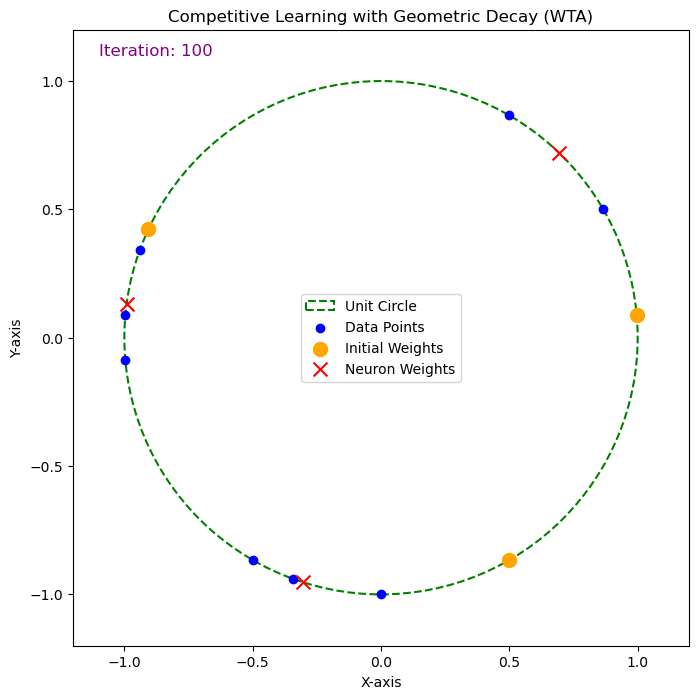

Trained Weights (Geometric Decay):
Weight 1: Magnitude = 1.0000, Angle = 46.19 degrees
Weight 2: Magnitude = 1.0000, Angle = 172.49 degrees
Weight 3: Magnitude = 1.0000, Angle = 252.29 degrees


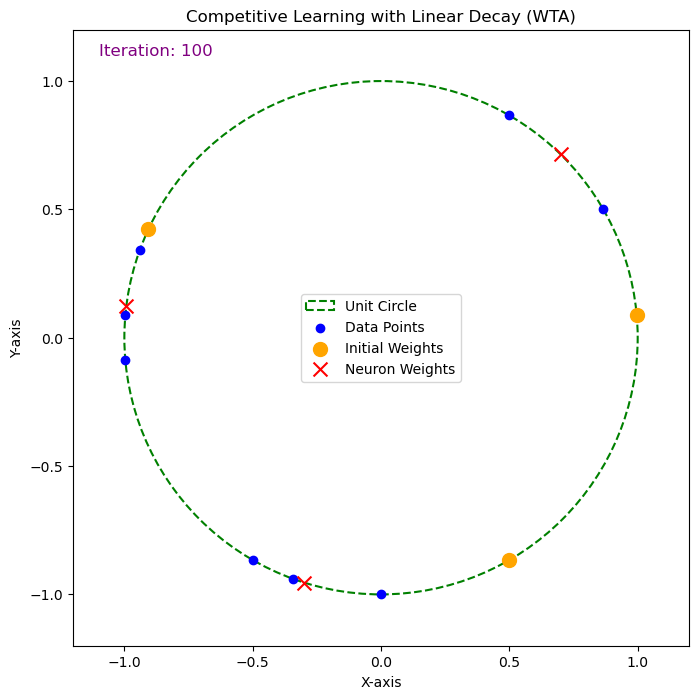

Trained Weights (Linear Decay):
Weight 1: Magnitude = 1.0000, Angle = 45.62 degrees
Weight 2: Magnitude = 1.0000, Angle = 172.79 degrees
Weight 3: Magnitude = 1.0000, Angle = 252.63 degrees


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 生成单位圆上的点集
def generate_circle_points(num_points):
    angles = 2 * np.pi * np.random.rand(num_points)
    points = np.array([np.cos(angles), np.sin(angles)]).T
    return points

# 初始化训练集合，由八个样本向量组成
def generate_fixed_points():
    angles = np.array([185, 175, 160, 270, 250, 240, 30, 60]) * np.pi / 180  # 将角度转换为弧度
    points = np.array([np.cos(angles), np.sin(angles)]).T
    return points

# 初始化神经网络权重
def initialize_weights():
    angles = np.array([5, 155, 300]) * np.pi / 180  # 将角度转换为弧度
    weights = np.array([np.cos(angles), np.sin(angles)]).T
    return weights

# 竞争神经网络的训练过程 (胜者为王, WTA)
def competitive_learning(points, weights, lr_schedule, epochs):
    num_neurons = weights.shape[0]
    weights_history = [weights.copy()]
    
    for epoch in range(epochs):
        lr = lr_schedule(epoch)
        for point in points:
            # 计算每个神经元的距离
            distances = np.linalg.norm(weights - point, axis=1)
            # 找到获胜神经元
            winner_idx = np.argmin(distances)
            # 更新获胜神经元的权重
            weights[winner_idx] += lr * (point - weights[winner_idx])
            # 归一化权重，以确保它们仍然在单位圆上
            weights[winner_idx] /= np.linalg.norm(weights[winner_idx])
        weights_history.append(weights.copy())
    
    return weights, weights_history

# 可视化聚类结果为动图
def visualize_animation(points, initial_weights, weights_history, title, filename):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)
    
    # 绘制单位圆
    circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--', linewidth=1.5, label='Unit Circle')
    ax.add_artist(circle)
    
    # 绘制数据点
    ax.scatter(points[:, 0], points[:, 1], c='blue', label='Data Points')
    initial_scatter = ax.scatter(initial_weights[:, 0], initial_weights[:, 1], c='orange', marker='o', s=100, label='Initial Weights')
    weights_scatter = ax.scatter([], [], c='red', marker='x', s=100, label='Neuron Weights')
    iteration_text = ax.text(-1.1, 1.1, '', fontsize=12, color='purple')
    ax.legend()
    
    def update(frame):
        weights_scatter.set_offsets(weights_history[frame])
        iteration_text.set_text(f'Iteration: {frame}')
        return weights_scatter, iteration_text
    
    ani = animation.FuncAnimation(fig, update, frames=len(weights_history), blit=True)
    ani.save(filename, writer='pillow')
    plt.show()

# 输出权重的大小和角度
def print_weights(weights):
    for i, weight in enumerate(weights):
        magnitude = np.linalg.norm(weight)
        angle = np.arctan2(weight[1], weight[0]) * 180 / np.pi
        if angle < 0:
            angle += 360
        print(f"Weight {i + 1}: Magnitude = {magnitude:.4f}, Angle = {angle:.2f} degrees")

if __name__ == "__main__":
    # 参数设置
    num_neurons = 3  # 神经元个数
    initial_lr = 0.8  # 初始学习率
    epochs = 100  # 训练轮数

    # 生成数据和初始化权重
    points = generate_fixed_points()
    initial_weights = initialize_weights()

    # 学习速率等比下降，比例为 0.75
    lr_schedule_geometric = lambda epoch: initial_lr * (0.75 ** epoch)
    trained_weights_geometric, weights_history_geometric = competitive_learning(points, initial_weights.copy(), lr_schedule_geometric, epochs)
    visualize_animation(points, initial_weights, weights_history_geometric, 'Competitive Learning with Geometric Decay (WTA)', '.\\geometric_decay.gif')
    print("Trained Weights (Geometric Decay):")
    print_weights(trained_weights_geometric)

    # 学习速率线性下降
    lr_schedule_linear = lambda epoch: max(initial_lr * (1 - epoch / epochs), 0.01)
    trained_weights_linear, weights_history_linear = competitive_learning(points, initial_weights.copy(), lr_schedule_linear, epochs)
    visualize_animation(points, initial_weights, weights_history_linear, 'Competitive Learning with Linear Decay (WTA)', '.\\linear_decay.gif')
    print("Trained Weights (Linear Decay):")
    print_weights(trained_weights_linear)


## 不同初始位置对训练结果的影响

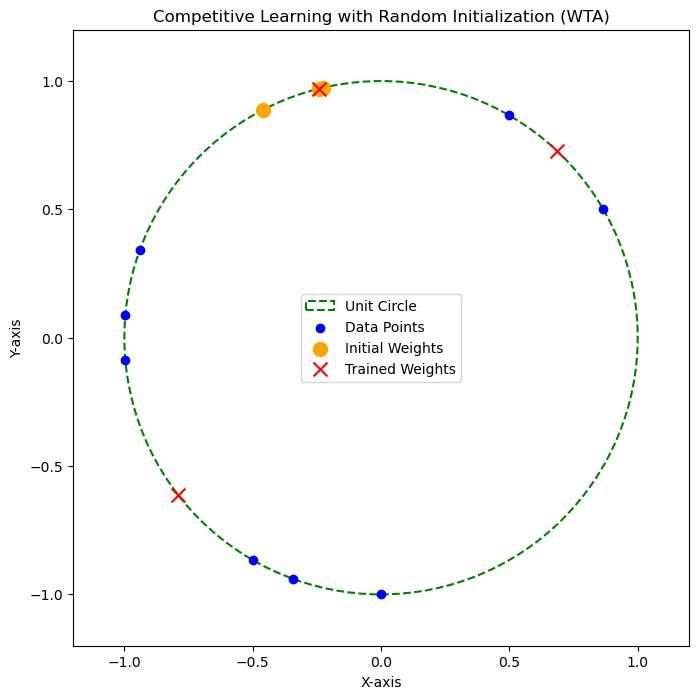

Trained Weights (Random Initialization):
Weight 1: Magnitude = 1.0000, Angle = 217.69 degrees
Weight 2: Magnitude = 1.0000, Angle = 103.96 degrees
Weight 3: Magnitude = 1.0000, Angle = 46.82 degrees


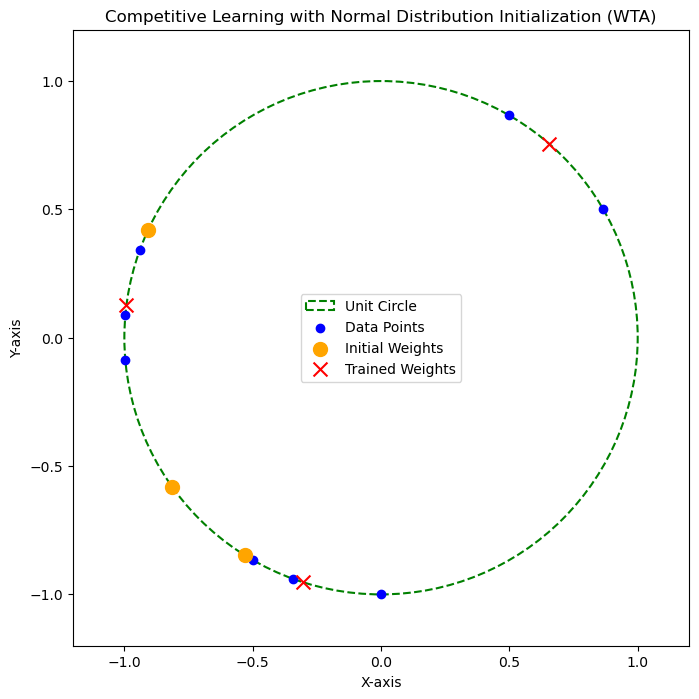

Trained Weights (Normal Distribution Initialization):
Weight 1: Magnitude = 1.0000, Angle = 49.05 degrees
Weight 2: Magnitude = 1.0000, Angle = 252.23 degrees
Weight 3: Magnitude = 1.0000, Angle = 172.67 degrees


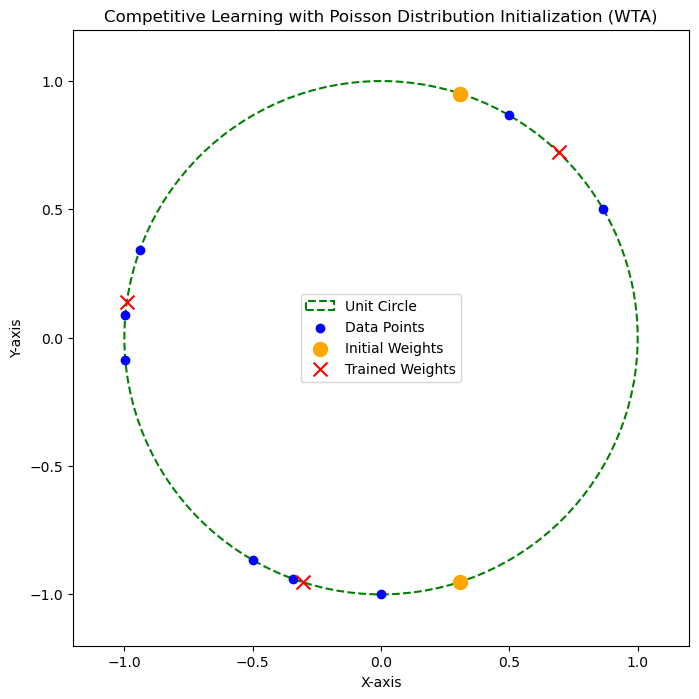

Trained Weights (Poisson Distribution Initialization):
Weight 1: Magnitude = 1.0000, Angle = 252.21 degrees
Weight 2: Magnitude = 1.0000, Angle = 172.01 degrees
Weight 3: Magnitude = 1.0000, Angle = 46.23 degrees


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 生成单位圆上的点集
def generate_circle_points(num_points):
    angles = 2 * np.pi * np.random.rand(num_points)
    points = np.array([np.cos(angles), np.sin(angles)]).T
    return points

# 初始化训练集合，由八个样本向量组成
def generate_fixed_points():
    angles = np.array([185, 175, 160, 270, 250, 240, 30, 60]) * np.pi / 180  # 将角度转换为弧度
    points = np.array([np.cos(angles), np.sin(angles)]).T
    return points

# 随机初始化神经网络权重
def initialize_weights_random(num_neurons):
    angles = 2 * np.pi * np.random.rand(num_neurons)  # 随机生成角度
    weights = np.array([np.cos(angles), np.sin(angles)]).T
    return weights

# 正态分布初始化神经网络权重
def initialize_weights_normal(num_neurons):
    angles = np.random.normal(loc=np.pi, scale=np.pi / 4, size=num_neurons)  # 使用正态分布生成角度
    weights = np.array([np.cos(angles), np.sin(angles)]).T
    return weights

# 泊松分布初始化神经网络权重
def initialize_weights_poisson(num_neurons):
    angles = np.random.poisson(lam=3, size=num_neurons) * (2 * np.pi / 10)  # 使用泊松分布生成角度
    weights = np.array([np.cos(angles), np.sin(angles)]).T
    return weights

# 竞争神经网络的训练过程 (胜者为王, WTA)
def competitive_learning(points, weights, lr, epochs):
    num_neurons = weights.shape[0]
    
    for epoch in range(epochs):
        for point in points:
            # 计算每个神经元的距离
            distances = np.linalg.norm(weights - point, axis=1)
            # 找到获胜神经元
            winner_idx = np.argmin(distances)
            # 更新获胜神经元的权重
            weights[winner_idx] += lr * (point - weights[winner_idx])
            # 归一化权重，以确保它们仍然在单位圆上
            weights[winner_idx] /= np.linalg.norm(weights[winner_idx])
    
    return weights

# 可视化聚类结果
def visualize_training(points, initial_weights, trained_weights, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)
    
    # 绘制单位圆
    circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--', linewidth=1.5, label='Unit Circle')
    ax.add_artist(circle)
    
    # 绘制数据点
    ax.scatter(points[:, 0], points[:, 1], c='blue', label='Data Points')
    ax.scatter(initial_weights[:, 0], initial_weights[:, 1], c='orange', marker='o', s=100, label='Initial Weights')
    # 绘制最终训练后的神经元权重
    ax.scatter(trained_weights[:, 0], trained_weights[:, 1], c='red', marker='x', s=100, label='Trained Weights')
    ax.legend()
    
    plt.show()

# 输出权重的大小和角度
def print_weights(weights):
    for i, weight in enumerate(weights):
        magnitude = np.linalg.norm(weight)
        angle = np.arctan2(weight[1], weight[0]) * 180 / np.pi
        if angle < 0:
            angle += 360
        print(f"Weight {i + 1}: Magnitude = {magnitude:.4f}, Angle = {angle:.2f} degrees")

if __name__ == "__main__":
    # 参数设置
    num_neurons = 3  # 神经元个数
    lr = 0.1  # 固定学习率
    epochs = 20  # 训练轮数

    # 生成数据和初始化随机权重
    points = generate_fixed_points()
    initial_weights_random = initialize_weights_random(num_neurons)
    trained_weights_random = competitive_learning(points, initial_weights_random.copy(), lr, epochs)
    visualize_training(points, initial_weights_random, trained_weights_random, 'Competitive Learning with Random Initialization (WTA)')
    print("Trained Weights (Random Initialization):")
    print_weights(trained_weights_random)

    # 初始化正态分布权重
    initial_weights_normal = initialize_weights_normal(num_neurons)
    trained_weights_normal = competitive_learning(points, initial_weights_normal.copy(), lr, epochs)
    visualize_training(points, initial_weights_normal, trained_weights_normal, 'Competitive Learning with Normal Distribution Initialization (WTA)')
    print("Trained Weights (Normal Distribution Initialization):")
    print_weights(trained_weights_normal)

    # 初始化泊松分布权重
    initial_weights_poisson = initialize_weights_poisson(num_neurons)
    trained_weights_poisson = competitive_learning(points, initial_weights_poisson.copy(), lr, epochs)
    visualize_training(points, initial_weights_poisson, trained_weights_poisson, 'Competitive Learning with Poisson Distribution Initialization (WTA)')
    print("Trained Weights (Poisson Distribution Initialization):")
    print_weights(trained_weights_poisson)


# 不同初始化方式对训练结果的影响

不同的初始化分布对训练结果的影响主要体现在初始权重的位置及其与数据点的接近程度，从而影响神经元的收敛路径和最终的分布。

1. 随机分布初始化

特点：随机分布的权重初始位置在单位圆上均匀分布，但完全依赖于随机性。

影响：在训练过程中，权重会逐渐向最近的数据点移动。由于完全随机，训练过程和结果的稳定性可能会稍差，特别是在初始权重与数据点距离较远的情况下，可能需要更多的迭代才能收敛。

2. 正态分布初始化

特点：使用正态分布（中心在 π 处，标准差为 π/4），初始化的权重更有可能集中在某些特定的角度上。

影响：这会使得权重初始化时集中在单位圆的某些部分，这样的初始化可能导致部分神经元偏离较远，训练时它们更容易失去作用，从而可能影响到聚类的均衡性和精确性。

3. 泊松分布初始化

特点：泊松分布产生的权重初始化位置相对集中，通常生成较少的离群点。

影响：由于泊松分布倾向于特定的角度，初始权重的分布可能会有较大的局部密集性，导致训练过程中有些权重相互竞争相同的区域，而某些区域可能没有神经元覆盖。这可能会导致训练不均衡，无法很好地覆盖所有数据点。

总结影响

训练效果的稳定性：随机初始化可能导致训练结果不稳定，而正态和泊松分布则取决于参数设定，可能产生偏置。

收敛速度和精度：初始权重与数据点的接近程度影响了收敛速度，初始权重分布过于偏向某一区域时，可能导致神经元无法均匀覆盖数据点，从而影响聚类效果。

初始化对最终分布的影响：不同的初始化方式会对训练结果产生显著的影响，尤其是对权重的最终位置和数据点的覆盖情况。因此，选择合适的初始化方式需考虑应用场景以及数据点的分布特点，以保证聚类的有效性。

### 字母CHL竞争算法识别

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random

class CompetitiveNeuralNetwork:
    def __init__(self, num_neurons, input_dim, learning_rate, learning_rate_decay, num_epochs):
        self.num_neurons = num_neurons
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.learning_rate_decay = 0.75
        self.num_epochs = num_epochs
        self.weights = np.random.rand(num_neurons, input_dim)  # 初始化权重（0到1之间的随机小数）

    def train(self, data_samples):
        for epoch in range(self.num_epochs):
            for sample in data_samples:
                # 计算每个神经元的输出（与输入向量的欧氏距离）
                distances = np.linalg.norm(self.weights - sample, axis=1)
                # 找到距离最小的神经元作为胜者
                winner_idx = np.argmin(distances)
                # 更新胜者神经元的权重
                self.weights[winner_idx] += self.learning_rate * (sample - self.weights[winner_idx])
            # 学习速率衰减
            self.learning_rate -= self.learning_rate_decay*self.learning_rate

    def get_weights(self):
        return self.weights

    def generate_noisy_samples(self, samples, hamming_distance=1, num_noisy_samples=1):
        noisy_samples = []
        for sample in samples:
            for _ in range(num_noisy_samples):
                noisy_sample = sample.copy()
                flip_indices = random.sample(range(len(sample)), hamming_distance)
                for flip_index in flip_indices:
                    noisy_sample[flip_index] = 1 - noisy_sample[flip_index]  # 0变1，1变0
                noisy_samples.append(noisy_sample)
        return noisy_samples

# 初始化参数
num_neurons = 3 # 竞争层神经元个数
input_dim = 25  # 输入维度（假设每个字母向量由25个特征表示）
learning_rate = 0.8  # 初始学习速率
learning_rate_decay = 0.5  # 学习速率衰减
num_epochs = 2000  # 训练轮数

# 创建竞争神经网络实例
cnn = CompetitiveNeuralNetwork(num_neurons, input_dim, learning_rate, learning_rate_decay, num_epochs)

# 训练样本（3个正确样本）
correct_samples = [
    np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]),  # 样本C
    np.array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]),  # 样本I
    np.array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]),  # 样本T
]

# 生成带有噪声的样本，噪声样本与正确样本之间的海明距离为1，生成每个正确样本的5个噪声样本
noisy_samples = cnn.generate_noisy_samples(correct_samples, hamming_distance=1, num_noisy_samples=5)

# 合并样本
data_samples = correct_samples + noisy_samples

# 训练竞争神经网络
cnn.train(data_samples)

# 输出训练后的神经元内星向量结果
weights = cnn.get_weights()
for i, neuron_weights in enumerate(weights):
    print(f"Neuron {i + 1} weights: {neuron_weights}")


# 生成新的测试样本，噪声样本与正确样本之间的海明距离为1，生成20个噪声样本用于测试
test_samples = cnn.generate_noisy_samples(correct_samples, hamming_distance=1, num_noisy_samples=20)

# 测试竞争神经网络
print("\nTesting the trained neural network with new noisy samples:")
correct_predictions = 0
for i, test_sample in enumerate(test_samples):
    distances = np.linalg.norm(weights - test_sample, axis=1)
    winner_idx = np.argmin(distances)
    #print(winner_idx)
    #print(f"Test Sample {i + 1}: Winner Neuron = {winner_idx +1}")
    # 假设正确样本C, I, T对应神经元1, 2, 3分别进行分类
    if(i<=19):
        idx=0
    if(19<i<39):
        idx=1
    else :
        idx=2;

    if idx == winner_idx:
        correct_predictions += 1

# 计算并输出识别的准确率
accuracy = correct_predictions / len(test_samples)
print(f"\nAccuracy of the trained neural network: {accuracy * 100:.2f}%")


test_samples2 = cnn.generate_noisy_samples(correct_samples, hamming_distance=2, num_noisy_samples=30)

# 测试竞争神经网络
print("\nTesting the trained neural network with new noisy samples:")
correct_predictions2 = 0
for i, test_sample in enumerate(test_samples2):
    distances = np.linalg.norm(weights - test_sample, axis=1)
    winner_idx = np.argmin(distances)
    #print(winner_idx)
    #print(f"Test Sample {i + 1}: Winner Neuron = {winner_idx +1}")
    # 假设正确样本C, I, T对应神经元1, 2, 3分别进行分类
    if(i<=19):
        idx=0
    if(19<i<39):
        idx=1
    else :
        idx=2;

    if idx == winner_idx:
        correct_predictions2 += 1

# 计算并输出识别的准确率
accuracy2 = correct_predictions2 / len(test_samples2)
print(f"\nAccuracy of the trained neural network: {accuracy2 * 100:.2f}%")

Neuron 1 weights: [0.38979847 0.07504206 0.83338905 0.01000709 0.56380391 0.78757509
 0.81793017 0.87664502 0.90061604 0.04279246 0.44593717 0.84486245
 0.82743215 0.6499069  0.41150888 0.23220307 0.78980403 0.27887805
 0.42679503 0.31283745 0.55445503 0.28212393 0.45982082 0.01618685
 0.68977403]
Neuron 2 weights: [6.91806044e-01 1.00000000e+00 1.00000000e+00 8.89849837e-01
 6.39517230e-01 1.18874272e-10 1.24098361e-11 8.46731326e-01
 1.37892881e-01 1.19884606e-10 1.24332588e-10 1.30724087e-11
 1.00000000e+00 1.50335790e-11 1.63915061e-11 1.07689506e-10
 1.15600947e-11 8.69719893e-01 1.19068616e-11 1.09780058e-10
 3.64675707e-12 4.56540591e-01 8.30399899e-01 3.60482770e-01
 5.67558139e-02]
Neuron 3 weights: [5.55782980e-05 8.52498304e-01 6.66008775e-01 9.99992872e-01
 3.83697345e-05 9.99980715e-01 2.75530980e-05 4.21588042e-05
 5.33517301e-05 9.99961914e-01 9.99981207e-01 3.72829308e-05
 1.23849925e-01 3.00620511e-01 2.81919712e-05 9.99991651e-01
 3.36509757e-05 7.93904399e-07 4.02315